# Part II - Explanatory analysis of Fordgobike 2019 data

## by Caroline Ayieko

## Investigation Overview
- In this investigation, I wanted to focus on the following questions:
    1. When are most trips taken in terms of time of day, day of the week, or month of the year?
    2. How long does the average trip take?
    3. Does the above depend on if a user is a subscriber or customer?
    4. How trip duration is dependent on other specifications from the dataset.


## Dataset Overview

This data includes information about 183412 individual rides made in a bike-sharing system covering the greater San Francisco Bay area in the month of Febraury. The dataset can be downloaded [here](https://docs.google.com/document/d/e/2PACX-1vQmkX4iOT6Rcrin42vslquX2_wQCjIa_hbwD0xmxrERPSOJYDtpNc_3wwK_p9_KpOsfA6QVyEHdxxq7/pub) and has attributes such as duration, user type, start/end time, as well as additional information such as bike id, rental access method, start/end station, etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time
import datetime
import calendar
import warnings

%matplotlib inline

# suppress warnings from final output
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
clean_df = df.copy()
#remove null values
clean_df = clean_df.dropna()

def erroneous_df(fordbike):
    # Use pd.to_datetime to convert datatype to datetime
    fordbike.start_time = pd.to_datetime(fordbike.start_time)
    fordbike.end_time = pd.to_datetime(fordbike.end_time)

    # Use astype(str) to convert datatype to str
    fordbike.start_station_id = fordbike.bike_id.astype(str)
    fordbike.end_station_id = fordbike.bike_id.astype(str)
    fordbike.bike_id = fordbike.bike_id.astype(str)

    # Use astype('category') to set user type, bike_share_for_all_trip, rental_access_method to category
    fordbike.user_type = fordbike.user_type.astype('category')
    fordbike.member_gender = fordbike.member_gender.astype('category')
    fordbike.bike_share_for_all_trip = fordbike.bike_share_for_all_trip.astype('category')

    # change the type of 'member_birth_year'
    fordbike.member_birth_year = fordbike.member_birth_year.astype(int)
    return fordbike.dtypes

erroneous_df(clean_df)

clean_df['duration_minute'] = clean_df['duration_sec']/60

clean_df['start_date'] = clean_df.start_time.dt.strftime('%Y-%m-%d')
clean_df['start_hour'] = clean_df.start_time.dt.hour
clean_df['start_dayofweek'] =clean_df.start_time.dt.strftime('%A')
clean_df['start_month'] = clean_df.start_time.dt.strftime('%B')

#calculate age
clean_df['age_member'] = 2019 - clean_df['member_birth_year']
#change data type of age_member to int type
clean_df['age_member'] = clean_df['age_member'].astype('int')




## Distribution of Bikes Trip Duration
- Bike duration in the dataset take on huge range of values, ranging from a minimum of 61(1 minutes) seconds to 84548(1409 minutes) seconds as the maximum. I converted the duration from seconds to minutes and removed outliers. I considered outliers to be values greater than 66 minutes which I filterd out. minute. The average Trip took 10 minutes. Approximately half of the riders took 8 minutes which shows that most rides are short.

In [3]:
#statistics summary
clean_df['duration_minute'].describe(percentiles=[.99])
#filter out Trip duration >66 minutes to remove outliers
clean_df= clean_df.query('duration_minute <= 66')
#show outliers have been removed
clean_df['duration_minute'].describe()

count    173735.000000
mean         10.359211
std           7.570323
min           1.016667
25%           5.366667
50%           8.450000
75%          13.016667
max          66.000000
Name: duration_minute, dtype: float64

Text(0.5, 0, 'Trip Duration in Minute')

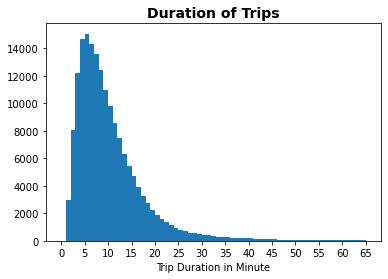

In [4]:
#plot duration of trips after removing outliers
bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=clean_df, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);
plt.title('Duration of Trips', fontsize=14, fontweight='bold')
plt.xlabel('Trip Duration in Minute')

  ## User types in the dataset
 - The subscribers constitute majority of users(90.8%) and  and customers are the minority users(9.2%).  

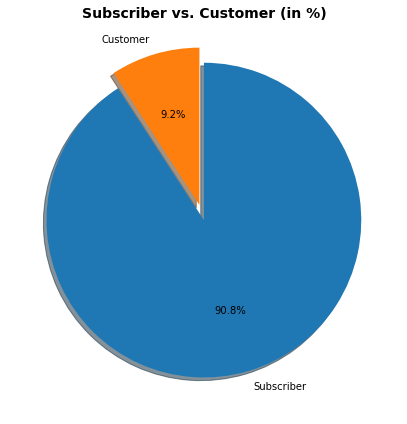

In [5]:
plt.figure(figsize=[12, 6], facecolor='w')
explode = (0, 0.1)
sorted_counts = clean_df['user_type'].value_counts()
plt.pie(sorted_counts, explode=explode, labels=sorted_counts.index, autopct='%1.1f%%', shadow=True, startangle=90, counterclock=False)
plt.title('Subscriber vs. Customer (in %)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Trip duration in different days of the week
 - The trip duration is similar in Monday through Friday but it's   longer on weekends.

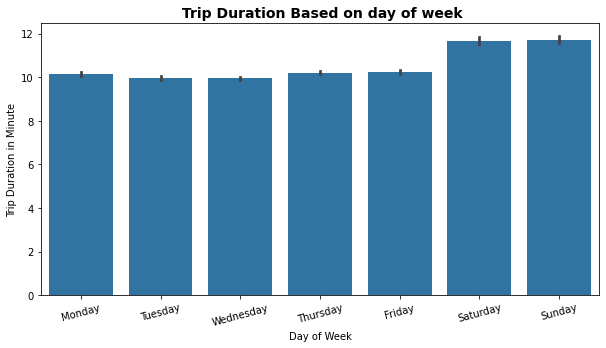

In [6]:
plt.figure(figsize=(10, 5))
base_color = sb.color_palette()[0]
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
clean_df['start_dayofweek'] = clean_df['start_dayofweek'].astype(weekdaycat)

#plot
sb.barplot(data=clean_df, x='start_dayofweek', y='duration_minute', color=base_color);
plt.title(' Trip Duration Based on day of week',fontsize=14, fontweight='bold')
plt.xlabel('Day of Week');
plt.ylabel('Trip Duration in Minute');
plt.xticks(rotation=15);

## Hourly bike usage in number per user type
- Subscribers take most of their trips around 8-9am and 4-6pm, typical commute hours probably to work. There are less bike rides during 10am-3pm. As for customers, they have more riders taking trips at 10am-3pm as compared to those of subscribers. 

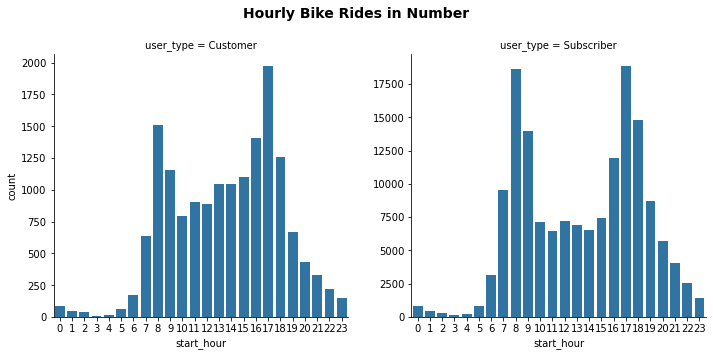

In [7]:
# Use Facet & catplot to plot subscribers and customers
base_color = sb.color_palette()[0]
sb.catplot(data=clean_df, x='start_hour', col='user_type', kind='count', color=base_color, sharey=False)
plt.subplots_adjust(top=0.85)
plt.suptitle('Hourly Bike Rides in Number', fontsize=14, fontweight='bold');

## How does the average trip duration vary in weekdays between customers and subscribers?
- Subscribers take much shorter trips compared to customers on each day of the week. Both user types have an obvious increase of trip duration on Saturdays and Sundays over weekdays, especially for customers.As for weekdays, customers usage of bikes is quite high on Monday. Subscribers usage seems to be more efficient than customers overall and maintained a very consistent average duration Monday through Friday. Subsciber usage is dependable for profit gain as compared to customers usage.

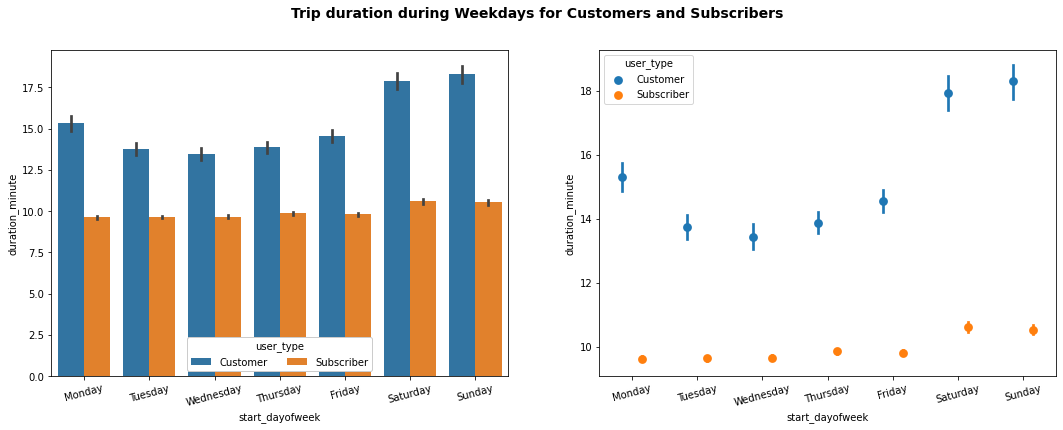

In [8]:
fig = plt.figure(figsize=[18, 6])
plt.suptitle('Trip duration during Weekdays for Customers and Subscribers', fontsize=14, fontweight='bold')
plt.subplot(1, 2, 1)
ax1 = sb.barplot(data = clean_df, x = 'start_dayofweek', y = 'duration_minute', hue = 'user_type')
ax1.legend(loc = 8, ncol = 3, framealpha = 1, title = 'user_type')
plt.xticks(rotation=15);

plt.subplot(1, 2, 2)
sb.pointplot(data = clean_df, x = 'start_dayofweek', y = 'duration_minute', hue = 'user_type',
                  dodge = 0.3, linestyles = "")
plt.xticks(rotation=15);

## How does the hourly usage vary during weekdays for customers and subscribers?
-There are different patterns on hourly usage depending on the user type. The subscribers seem to use the bikes more on weekdays and mostly during 8-9am and 5-6pm. This shows that they are used for commuting to work. As for customers, they have a greater usage of bike more on weekends as compared to subscribers and ride as from 10am-5pm. During the weekdays, the customers start using bikes heavily at 8am-9am and 5-6pm.

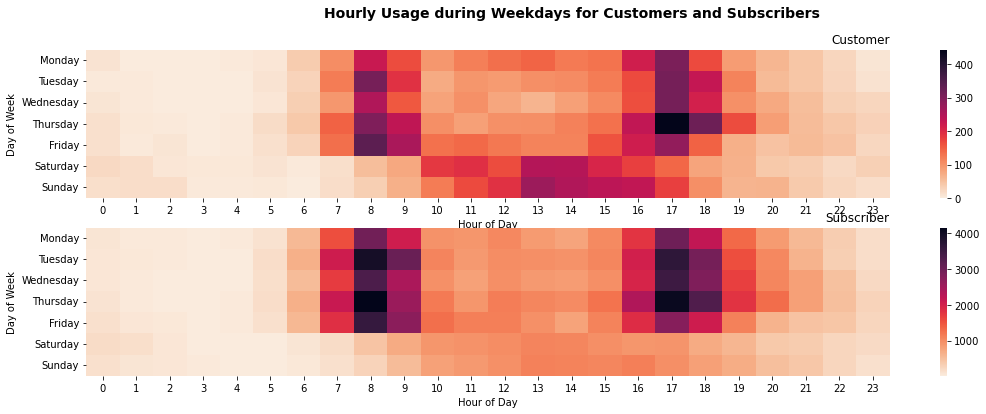

In [9]:
fig = plt.figure(figsize=[18, 6])
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', fontsize=14, fontweight='bold')

plt.subplot(2, 1, 1)
customers = clean_df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_dayofweek', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hour', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = clean_df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_dayofweek', 'start_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_dayofweek', columns='start_hour', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_ford_gobike_explanatory_analysis.ipynb --to slides --post serve --no-input --no-prompt